In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
df = pd.read_excel("Financial Sample.xlsx")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [3]:
# mô tả dữ liệu
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [4]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# kiểm tra dữ liệu không bị khuyết
df.notna()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
696,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
697,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
698,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [7]:
df1.shape

(700, 16)

In [8]:
df["Year"] = df["Year"].astype(str)

In [9]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price             int64
Sale Price                      int64
Gross Sales                   float64
Discounts                     float64
 Sales                        float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                           object
dtype: object

<AxesSubplot:xlabel='Profit'>

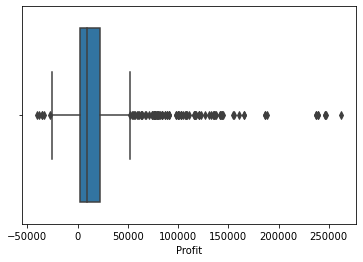

In [10]:
sns.boxplot(x=df1['Profit'])  # vẽ box plot cho dữ liệu ở cột Profit

In [11]:
Q1 = df1['Profit'].quantile(0.25)
Q3 = df1['Profit'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Profit'] < (Q1 - 1.5*IQR)) | (df1['Profit'] > (Q3 + 1.5*IQR)))

In [13]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

<AxesSubplot:xlabel='Profit'>

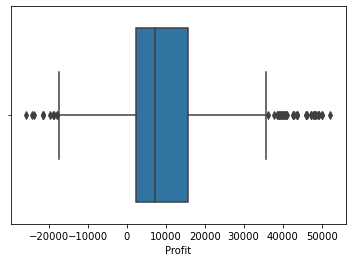

In [14]:
sns.boxplot(x=df2['Profit'])  # vẽ box plot cho dữ liệu ở cột Profit

In [15]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

In [16]:
# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Profit
df_s = scaler.fit_transform(df2[['Profit']])

In [17]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,597.000000
mean,0.459967
std,0.167986
min,0.000000
25%,0.361665
50%,0.425213
75%,0.533226
max,1.000000


<AxesSubplot:>

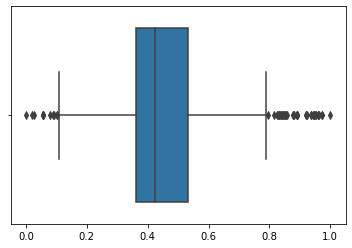

In [18]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

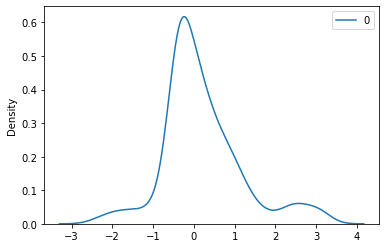

In [24]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [25]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

In [26]:
# Chuẩn hóa dữ liệu trong df với Robust Scaling ở 2 cột Profit
df_s = scaler.fit_transform(df2[['Profit']])

In [27]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,597.000000
mean,0.202573
std,0.979160
min,-2.478482
25%,-0.370411
50%,0.000000
75%,0.629589
max,3.350320


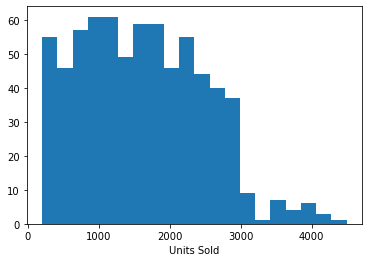

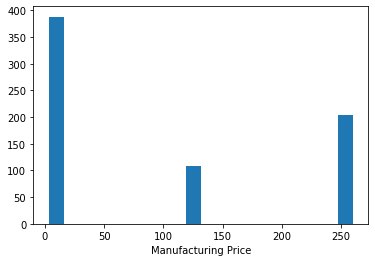

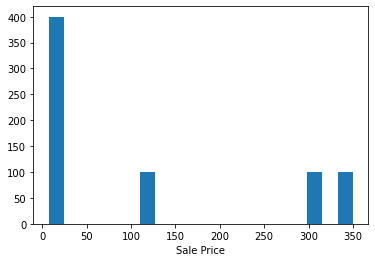

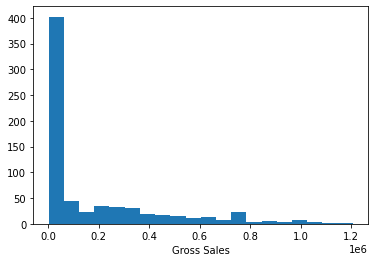

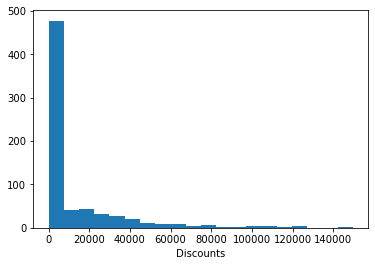

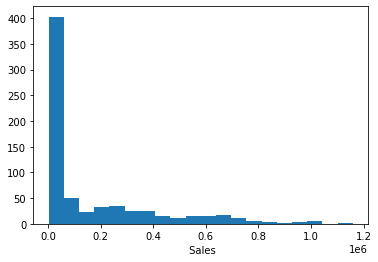

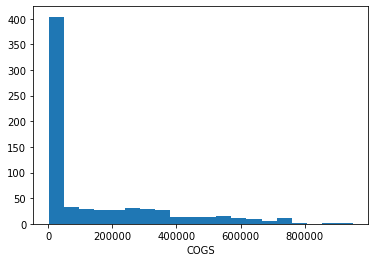

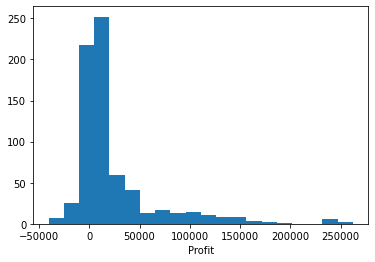

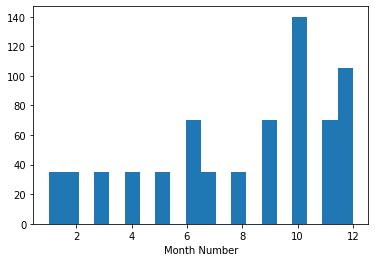

In [28]:
#Lưu tất cả những cột giá trị định lượng thành một list.
num_cols = df.select_dtypes(include = [int,float]).columns.to_list()
#Vẽ biểu đồ histogram cho những cột dữ liệu định lượng trong dataframe df
for col in num_cols:
    plt.hist(df[col],bins = 20)
    plt.xlabel(col)
    plt.show()

In [29]:
plt.scatter(df["Profit"], df["Profit"], color = "b")
plt.xlabel("Lot Frontage")
plt.ylabel("Lot Area")
plt.title("Scatterplot between Frontage and Area")
plt.legend = True
plt.show()

KeyError: 'Lot Frontage'